In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

# Dataset

In [ ]:
dataset_path = r"C:\Users\Syamala gonimadatala\Downloads\archive (4)\APPLE_DISEASE_DATASET"

# Image data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 337 images belonging to 4 classes.
Found 82 images belonging to 4 classes.


# Model design (CNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(4, activation='softmax')  # 4 classes
])

# Model compile

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model train

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.2997 - loss: 1.7344 - val_accuracy: 0.3780 - val_loss: 1.3381
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.3739 - loss: 1.3079 - val_accuracy: 0.3780 - val_loss: 1.3142
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 983ms/step - accuracy: 0.4184 - loss: 1.1967 - val_accuracy: 0.3780 - val_loss: 1.2491
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4837 - loss: 1.1047 - val_accuracy: 0.2439 - val_loss: 1.3957
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4748 - loss: 1.0520 - val_accuracy: 0.2195 - val_loss: 1.6165
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5727 - loss: 0.9801 - val_accuracy: 0.2073 - val_loss: 1.3606
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5519 - loss: 0.8976 - val_accuracy: 0.2805 - val_loss: 1.5896
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5905 - loss: 0.8950 - val_accuracy: 0.2683 - val_lo

# Accuracy & Loss graph

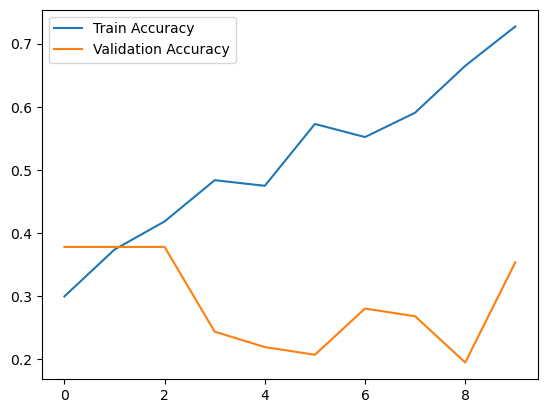

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Model save

In [22]:
model.save("apple_leaf_disease_model.keras")

# model prediction

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(
    r"C:\Users\Syamala gonimadatala\Downloads\archive (4)\APPLE_DISEASE_DATASET\HEALTHY LEAVES\1015.JPG.jpeg",
    target_size=(224,224)
)

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)

class_names = list(train_data.class_indices.keys())
print("Predicted Disease:", class_names[np.argmax(prediction)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Predicted Disease: HEALTHY LEAVES
